# Length

In [48]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'MathQA'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [49]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.0, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.0, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.0, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ..."
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.0, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ..."
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.0, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,d,"[d, d, d, d, d, d, d, d, d, d, d, d, d, d, d, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 6, 1, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8583690987124464, 0.31759656652360513,...","[0.0, 0.8583690987124464, 0.3157894736842105, ...","[0.0, 0.8583690987124464, 0.32119144565496494,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
496,496,b,"[b, b, b, b, b, b, b, b, b, b, b, b, b, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 7, 5, 8, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0

In [50]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,c,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.9591836734693877, 0.9333333333333333, ...","[0.0, 0.9527027027027027, 0.9342105263157895, ...","[0.0, 0.9591836734693877, 0.9529680365296804, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,b,"[e, e, c, a, e, 9-May, c, d, c, c, e, 9-May, c...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8916666666666666, 0.9285714285714286, ...","[0.0, 0.8916666666666666, 0.8455284552845528, ...","[0.0, 0.8916666666666666, 0.8857733175914995, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,c,"[c, a, c, c, c, d, c, c, c, c, c, c, 7, c, c, ...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[6, 6, 9, 6, 6, 4, 5, 6, 6, 7, 6, 6, 6, 6, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8622754491017964, 0.6601941747572815, ...","[0.0, 0.8571428571428572, 0.7061611374407584, ...","[0.0, 0.8622754491017964, 0.6989089685667595, ...","[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
3,3,d,"[d, d, a, 18-Jan, b, b, b, b, b, d, b, 18-Jan,...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 6, 6, 3, 5, 5, 3, 3, 3, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6637554585152838, 0.7188940092165899, ...","[0.0, 0.6637554585152838, 0.6571428571428571, ...","[0.0, 0.6637554585152838, 0.6420557002604689, ...","[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,a,"[a, b, a, d, b, a, b, cannot be determined, b,...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[4, 6, 5, 3, 8, 3, 6, 3, 3, 3, 2, 3, 4, 6, 6, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.5139442231075697, 0.5780590717299579, ...","[0.0, 0.5179282868525896, 0.6911196911196911, ...","[0.0, 0.5139442231075697, 0.6768800031546985, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,"[b, b, b, b, b, b, b, b, 17, b, 17, 17, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6560509554140128, 0.7225806451612904, ...","[0.0, 0.6560509554140128, 0.7176470588235294, ...","[0.0, 0.6560509554140128, 0.7371292487551419, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ..."
496,496,e,"[e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 3, 4, 3, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.682352941176

# Early stopping and SC 

In [51]:
from collections import Counter

def calculate_correctness(df):
    # Define a helper function to determine the majority and compare it with the correct answer
    def check_majority(answers, correct):
        if not answers:
            return 0
        # Count the occurrences of each answer and find the most common one
        most_common = Counter(answers).most_common(1)[0][0]
        # Compare the most common answer with the correct answer
        return 1 if most_common == correct else 0

    # Apply the helper function across the DataFrame rows
    df['SC_correctness'] = df.apply(lambda row: check_majority(row['CoT answers'], row['correct answer']), axis=1)
    return df

hard = calculate_correctness(hard)

In [52]:
hard.SC_correctness.value_counts()

SC_correctness
1    278
0    222
Name: count, dtype: int64

In [53]:
easy = calculate_correctness(easy)
easy.SC_correctness.value_counts()

SC_correctness
1    292
0    208
Name: count, dtype: int64

In [54]:
import pandas as pd

def evaluate_answers_with_window(df, window_size):
    # Helper function to evaluate answers with a sliding window
    def evaluate_window(answers, correct):
        # Track the number of steps (checks) taken
        steps = window_size-1
        
        # If the list is shorter than the window size, adjust the window size to the length of the list
        window_size_adjusted = min(window_size, len(answers))
        
        # Slide through the list with the adjusted window size
        for i in range(len(answers) - window_size_adjusted + 1):
            # Check the window content
            window = answers[i:i + window_size_adjusted]
            steps += 1
            
            # If all elements in the window are the same, evaluate correctness
            if window.count(window[0]) == window_size_adjusted:
                return 1 if window[0] == correct else 0, steps
        
        # If no unanimous window is found, use the same value as SC_correctness and set steps to the length of the list
        majority = Counter(answers).most_common(1)[0][0]
        correctness = 1 if majority == correct else 0
        return correctness, len(answers)

    # Apply the function to each row in the DataFrame
    result = df.apply(lambda row: evaluate_window(row['CoT answers'], row['correct answer']), axis=1)
    df['ES_correctness'] = result.apply(lambda x: x[0])
    df['ES_steps'] = result.apply(lambda x: x[1])

    return df

easy = evaluate_answers_with_window(easy,5)

In [55]:
easy.ES_correctness.value_counts()

ES_correctness
1    297
0    203
Name: count, dtype: int64

In [56]:
easy.ES_steps.mean()

18.648

In [57]:
hard = evaluate_answers_with_window(hard,5)
hard.ES_correctness.value_counts()

ES_correctness
1    276
0    224
Name: count, dtype: int64

In [58]:
hard.ES_steps.mean()

19.954

In [115]:
feature_li = [
 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 'SIM_COT_PW',
 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 'SIM_AC_PW',
 'CoT answers',
 
  ]

In [116]:
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,SC_correctness,ES_correctness,ES_steps
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.0, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,40
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.0, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,5
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.0, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...",1,1,5
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.0, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",1,1,6
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.0, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...",1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,d,"[d, d, d, d, d, d, d, d, d, d, d, d, d, d, d, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 6, 1, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8583690987124464, 0.31759656652360513,...","[0.0, 0.8583690987124464, 0.3157894736842105, ...","[0.0, 0.8583690987124464, 0.32119144565496494,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,5
496,496,b,"[b, b, b, b, b, b, b, b, b, b, b, b, b, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 7, 7, 5, 5, 6

# Visualize

In [117]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            values = df[column][i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000


In [127]:
hard_final['cot_answer'] = np.repeat(hard['correct answer'].values,40)

In [128]:
easy_final['cot_answer'] = np.repeat(easy['correct answer'].values,40)

In [129]:
hard_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,CoT answers,Correctness,cot_answer
0,12,0,0,0.000000,0.000000,0.000000,0,0,0,54,0,c
1,6,0,0,0.551867,0.549587,0.551867,0,0,0,c,1,c
2,4,0,0,0.605128,0.544355,0.595587,0,0,0,111,0,c
3,5,0,0,0.591954,0.527778,0.574372,0,0,0,c,1,c
4,6,0,0,0.480000,0.624506,0.630134,0,0,0,111,0,c
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7,0,0,0.860606,0.583333,0.821780,1,1,1,c,1,c
19996,6,0,0,0.917160,0.590580,0.815113,1,1,1,c,1,c
19997,6,0,0,0.775862,0.528986,0.772979,1,1,1,c,1,c
19998,6,0,0,0.837349,0.576087,0.830052,1,1,1,c,1,c


In [130]:
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,SC_correctness,ES_correctness,ES_steps
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.0, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,40
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.0, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,5
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.0, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...",1,1,5
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.0, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",1,1,6
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.0, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...",1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,d,"[d, d, d, d, d, d, d, d, d, d, d, d, d, d, d, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 6, 1, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8583690987124464, 0.31759656652360513,...","[0.0, 0.8583690987124464, 0.3157894736842105, ...","[0.0, 0.8583690987124464, 0.32119144565496494,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,5
496,496,b,"[b, b, b, b, b, b, b, b, b, b, b, b, b, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 7, 7, 5, 5, 6

In [63]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
LEN : Counter({4: 4370, 3: 3727, 5: 3678, 6: 2684, 7: 1709, 8: 1147, 2: 803, 9: 664, 10: 402, 1: 241, 0: 179, 11: 164, 12: 88, 13: 50, 14: 32, 15: 27, 16: 19, 17: 8, 19: 4, 18: 2, 95: 1, 20: 1})
QUA_IM : Counter({0: 19952, 1: 48})
DIF_IV : Counter({0: 18771, 2: 870, 5: 199, 9: 81, 10: 78, 1: 1})
SIM_AC_BIGRAM : Counter({1: 11231, 0: 8769})
SIM_AC_AGG : Counter({1: 12909, 0: 7091})
SIM_AC_PW : Counter({1: 10795, 0: 9205})
Correctness : Counter({1: 10142, 0: 9858})
--------------HARD--------------
LEN : Counter({4: 3727, 5: 3405, 3: 2970, 6: 2516, 7: 1752, 0: 1614, 8: 1241, 9: 735, 2: 713, 10: 489, 11: 249, 1: 224, 12: 163, 13: 72, 14: 56, 15: 25, 16: 21, 17: 10, 20: 5, 18: 4, 19: 3, 21: 2, 26: 1, 85: 1, 22: 1, 45: 1})
QUA_IM : Counter({0: 19936, 1: 64})
DIF_IV : Counter({0: 15951, 2: 2069, 10: 946, 5: 652, 9: 371, 1: 5, 11: 2, 3: 2, 6: 2})
SIM_AC_BIGRAM : Counter({1: 10580, 0: 9420})
SIM_AC_AGG : Counter({1: 12406, 0: 7594})
SIM_AC_PW : Counter({1: 10225

# Hard DF

Optimization terminated successfully.
         Current function value: 0.561590
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.1879
Time:                        16:32:57   Log-Likelihood:                -8985.4
converged:                       True   LL-Null:                       -11065.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3111      0.084     -3.698      0.000      -0.476      -0.146
LEN              

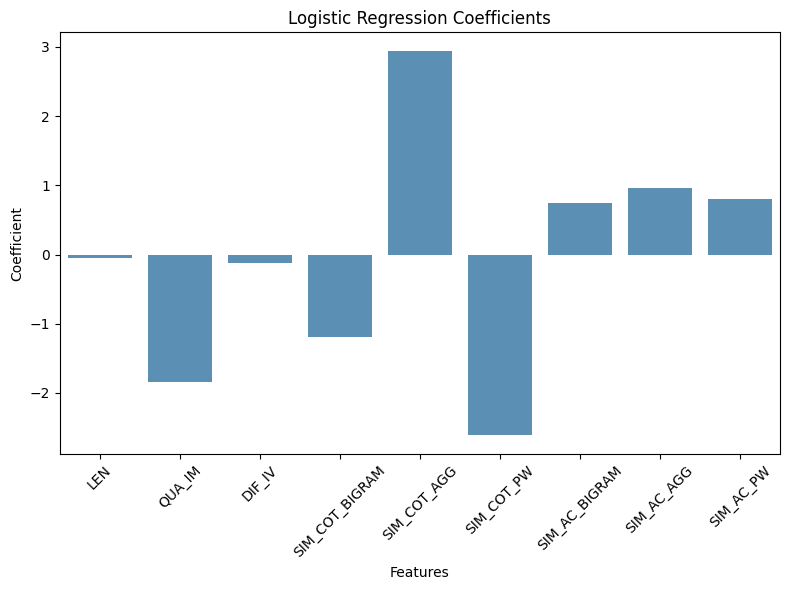

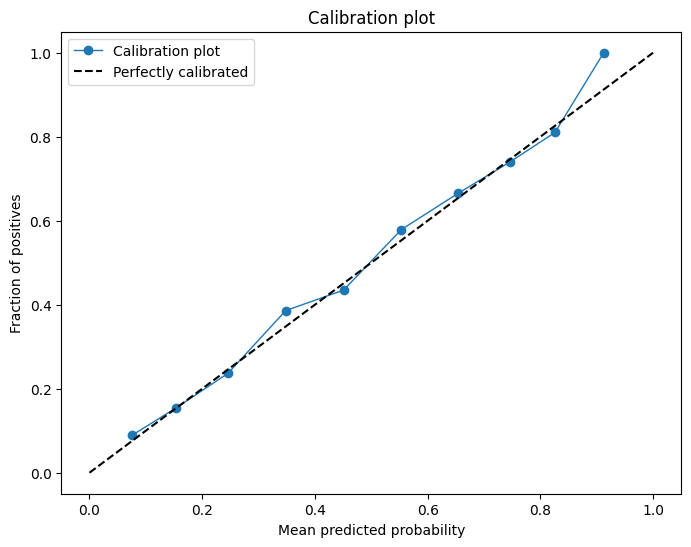

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard = hard_final['Correctness'].iloc[:split_idx]
X_test_hard = hard_final[feature_li].iloc[split_idx:]
y_test_hard = hard_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_hard = sm.add_constant(X_train_hard)
X_test_hard = sm.add_constant(X_test_hard)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_hard, X_train_hard)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard  = hard_final['Correctness'].iloc[:split_idx]
X_test_hard  = hard_final[feature_li].iloc[split_idx:]
y_test_hard  = hard_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hard , y_train_hard )

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_hard.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.7631569840388139
The Brier score is: 0.19953361700188194
Log Loss is: 0.6069689678736554


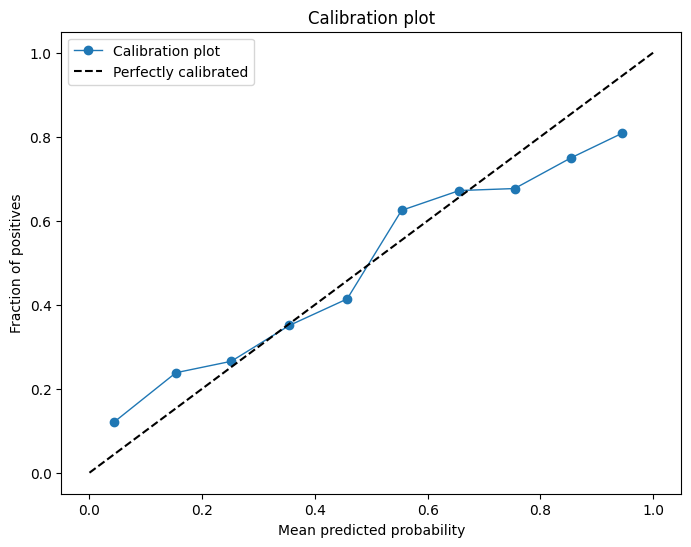

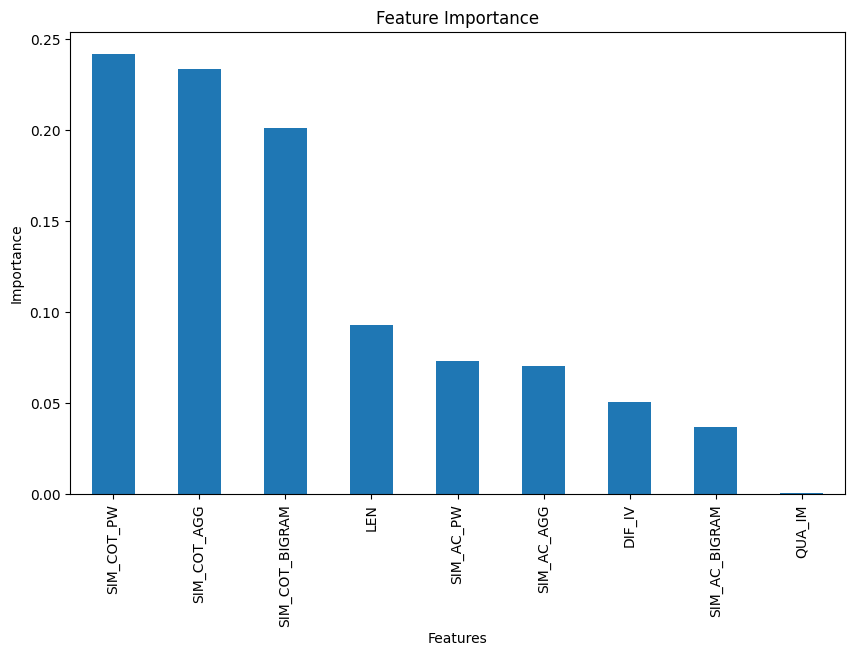

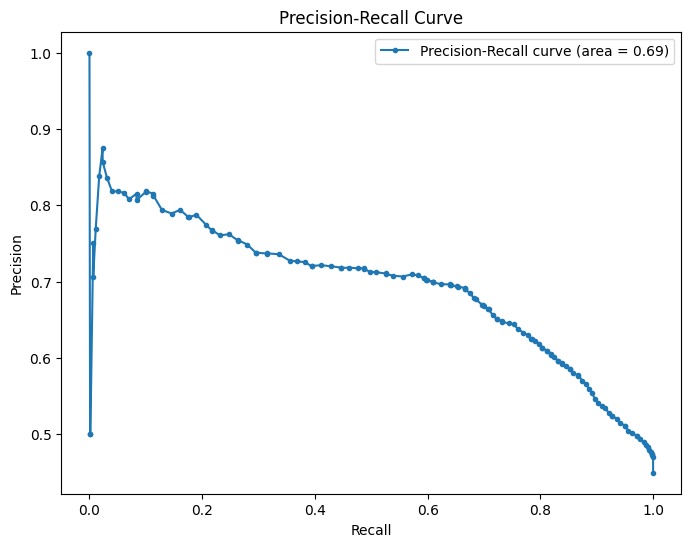

In [65]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_hard, y_train_hard)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_hard, y_pred_proba)
brier = brier_score_loss(y_test_hard, y_pred_proba)
logloss = log_loss(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_hard, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [91]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_hard, y_train_hard)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_hard)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_hard, y_probs)
auc_score = roc_auc_score(y_test_hard, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_hard, y_probs > thresh) for thresh in thresholds]
best_thresh_hard = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh_hard}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh_hard).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_hard, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_hard, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=feature_li)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

AUROC Score: 0.7772619216321346
Best Threshold: 0.3083841126777149
Confusion Matrix:
[[1290  913]
 [ 293 1504]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      2203
           1       0.62      0.84      0.71      1797

    accuracy                           0.70      4000
   macro avg       0.72      0.71      0.70      4000
weighted avg       0.73      0.70      0.70      4000



ValueError: Length of values (10) does not match length of index (9)

# Easy

         Current function value: 0.587503
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.1515
Time:                        16:14:12   Log-Likelihood:                -9400.0
converged:                      False   LL-Null:                       -11078.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5343      0.089     -5.977      0.000      -0.709      -0.359
LEN               -0.0566      0.008     -6.885      

/Users/guangyawan/miniconda3/envs/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [[-0.05604381 -1.67934593 -0.07118432 -1.39448917  2.62581731 -1.31506552
   0.54846094  0.80763085  0.87459093]]
Intercept: [-0.54915016]
The AUROC score is: 0.733340198440194


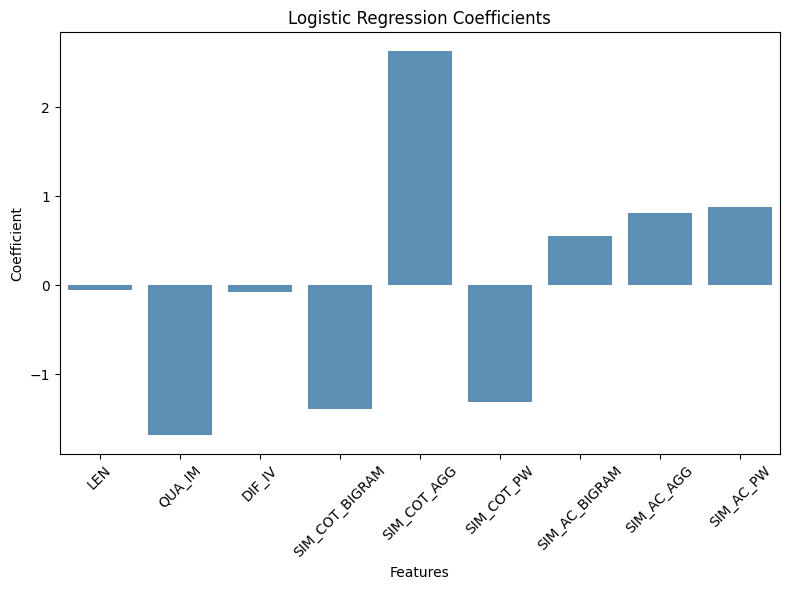

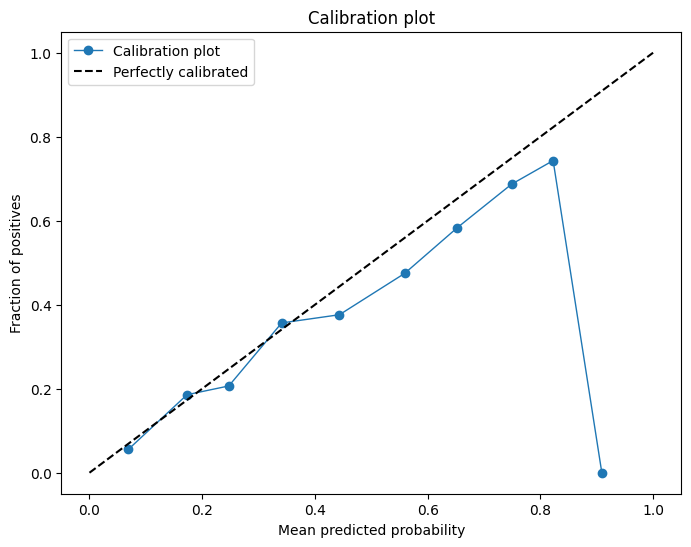

In [67]:

# Calculate the split index
split_idx = int(len(easy_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_easy = sm.add_constant(X_train_easy)
X_test_easy = sm.add_constant(X_test_easy)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_easy, X_train_easy)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_easy, y_train_easy)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_easy.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.7057512810390113
The Brier score is: 0.22773217045301744
Log Loss is: 0.6752575395681331


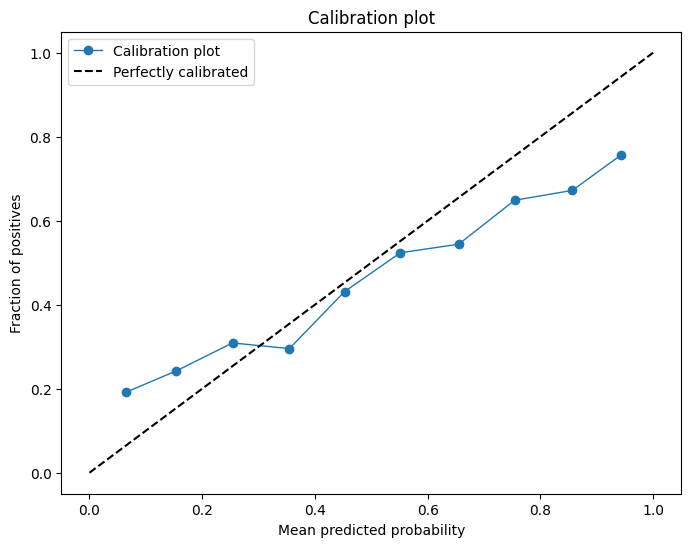

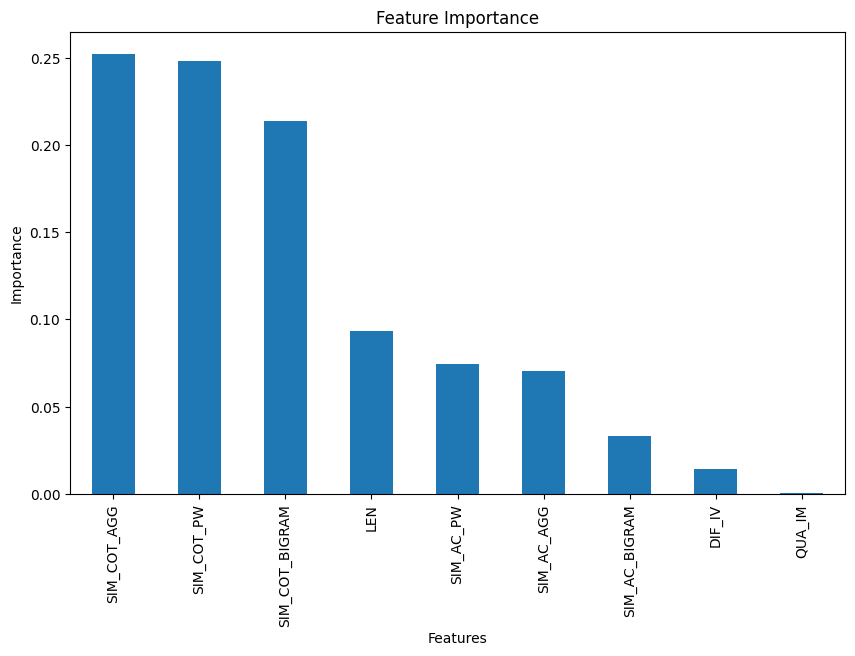

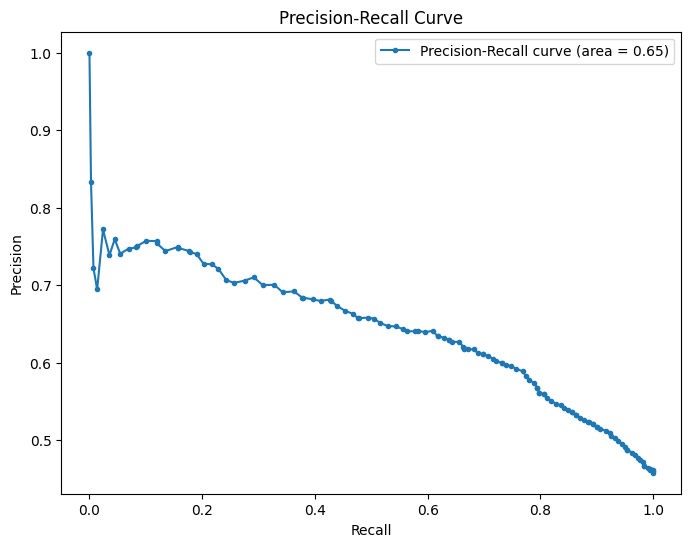

In [68]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_easy, y_train_easy)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_easy, y_pred_proba)
brier = brier_score_loss(y_test_easy, y_pred_proba)
logloss = log_loss(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_easy.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_easy, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [75]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_easy, y_train_easy)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_easy)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_easy, y_probs)
auc_score = roc_auc_score(y_test_easy, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_easy, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_easy, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_easy, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# CS based performance

In [96]:
hard[int(len(hard)*0.8):].SC_correctness.value_counts()

SC_correctness
1    54
0    46
Name: count, dtype: int64

In [97]:
hard[int(len(hard)*0.8):].ES_correctness.value_counts()

ES_correctness
1    53
0    47
Name: count, dtype: int64

In [98]:
hard[int(len(hard)*0.8):].ES_steps.mean()

21.46

In [99]:
hard_final['confidence_score']= model.predict_proba(hard_final[feature_li])[:,0]

In [131]:
hard_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,CoT answers,Correctness,cot_answer
0,12,0,0,0.000000,0.000000,0.000000,0,0,0,54,0,c
1,6,0,0,0.551867,0.549587,0.551867,0,0,0,c,1,c
2,4,0,0,0.605128,0.544355,0.595587,0,0,0,111,0,c
3,5,0,0,0.591954,0.527778,0.574372,0,0,0,c,1,c
4,6,0,0,0.480000,0.624506,0.630134,0,0,0,111,0,c
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7,0,0,0.860606,0.583333,0.821780,1,1,1,c,1,c
19996,6,0,0,0.917160,0.590580,0.815113,1,1,1,c,1,c
19997,6,0,0,0.775862,0.528986,0.772979,1,1,1,c,1,c
19998,6,0,0,0.837349,0.576087,0.830052,1,1,1,c,1,c


In [109]:
import pandas as pd
from collections import Counter

def process_blocks(df, threshold):
    # Define the size of each block
    block_size = 40
    
    # Prepare a list to store the results
    results = []
    
    # Iterate over the DataFrame in blocks of 40 rows
    for start in range(0, len(df), block_size):
        # Get the current block
        end = min(start + block_size, len(df))
        block = df.iloc[start:end]
        
        # Calculate cumulative difference
        cumulative_difference = (block['confidence_score'] - threshold).cumsum()
        
        # Find the index where the cumulative difference exceeds 1
        stop_idx = cumulative_difference[cumulative_difference > 1].first_valid_index()
        
        # If the threshold is exceeded, adjust the block to only up to the stopping point
        if pd.notna(stop_idx):
            stop_position = block.index.get_loc(stop_idx) + 1  # get_loc gets the position in the block
            block = block.iloc[:stop_position]
        
        # Calculate the majority of 'Correctness' based on the processed rows
        if len(block) > 0:
            majority = Counter(block['Correctness']).most_common(1)[0][0]
            rows_iterated = len(block)
        else:
            majority = None
            rows_iterated = 0
        
        # Append the result to the list of results
        results.append({'Majority Correctness': majority, 'Rows Iterated': rows_iterated})
    
    # Create a DataFrame from the list of results
    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
# Assuming 'hard_final' is your DataFrame and it has a 'confidence_score' column
threshold = best_thresh_hard
final_results = process_blocks(hard_final, threshold)
print(final_results)


     Majority Correctness  Rows Iterated
0                       0              3
1                       0             21
2                       1              7
3                       1              3
4                       1              7
..                    ...            ...
495                     1             40
496                     1             19
497                     0              3
498                     0              2
499                     1             40

[500 rows x 2 columns]


In [110]:
final_results['Majority Correctness'].value_counts()

Majority Correctness
0    276
1    224
Name: count, dtype: int64

In [111]:
final_results['Rows Iterated'].mean()

11.292